In [22]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas import DataFrame
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

def parser(x):
    return datetime.strptime(x,'%m/%d/%Y')

series = read_csv('Univeriate data without blank .csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

print (series.head())


Date
2017-01-01    323.8
2017-01-02    159.3
2017-01-03    178.7
2017-01-04    354.3
2017-01-05    115.0
Name: GHI, dtype: float64


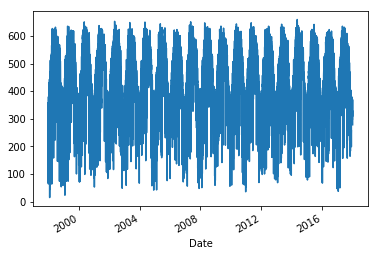

In [23]:
# To check the stationarity of the data 
series.plot()
pyplot.show()

In [25]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = timeseries.rolling(window=12).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

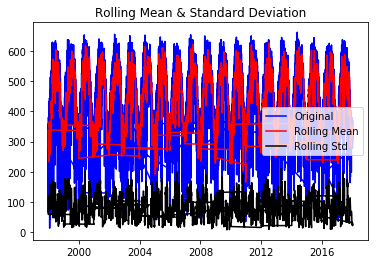

Results of Dickey-Fuller Test:
Test Statistic                -7.461755e+00
p-value                        5.331218e-11
#Lags Used                     2.100000e+01
Number of Observations Used    7.278000e+03
Critical Value (1%)           -3.431249e+00
Critical Value (5%)           -2.861937e+00
Critical Value (10%)          -2.566981e+00
dtype: float64


In [26]:
test_stationarity(series)

D:\Python\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
D:\Python\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
D:\Python\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will res

predicted=552.974070, expected=526.642857
predicted=541.382351, expected=146.214286
predicted=331.028013, expected=545.923077
predicted=516.653107, expected=581.461538
predicted=530.976730, expected=573.230769
predicted=533.372168, expected=536.615385
predicted=498.501677, expected=563.076923
predicted=514.751783, expected=455.923077
predicted=503.352894, expected=534.923077
predicted=541.051071, expected=427.000000
predicted=475.931411, expected=599.000000
predicted=559.581294, expected=565.230769
predicted=541.591773, expected=590.000000
predicted=556.379058, expected=583.230769
predicted=560.398220, expected=566.153846
predicted=557.597075, expected=554.692308
predicted=566.687273, expected=552.076923
predicted=561.480976, expected=512.230769
predicted=539.420309, expected=569.538462
predicted=563.916375, expected=565.923077
predicted=559.584948, expected=555.230769
predicted=553.950585, expected=540.583333
predicted=544.038319, expected=573.500000
predicted=561.702813, expected=570

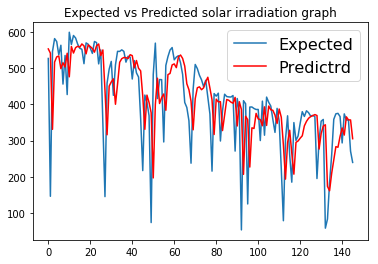

In [32]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def parser(x):
    return datetime.strptime(x,'%m/%d/%Y')

series = read_csv('Univeriate data without blank .csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = series.values
size = int(len(X) * 0.98)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
r_squared=r2_score(test, predictions)
print('Test MSE: %.3f' % error)
print('Test R_Squared : %.3f' % r_squared)

# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
plt.legend(['Expected', 'Predictrd'], fontsize=16)
plt.title('Expected vs Predicted solar irradiation graph')
pyplot.show()